<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230315_Pfizer_Vaccine_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2021/10/12/pfizer-vaccine-sentiment-analysis-using-python/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

import string
import re

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [3]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vaccination_tweets.csv")
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8082 non-null   int64 
 1   user_name         8082 non-null   object
 2   user_location     6452 non-null   object
 3   user_description  7576 non-null   object
 4   user_created      8082 non-null   object
 5   user_followers    8082 non-null   int64 
 6   user_friends      8082 non-null   int64 
 7   user_favourites   8082 non-null   int64 
 8   user_verified     8082 non-null   bool  
 9   date              8082 non-null   object
 10  text              8082 non-null   object
 11  hashtags          6133 non-null   object
 12  source            8081 non-null   object
 13  retweets          8082 non-null   int64 
 14  favorites         8082 non-null   int64 
 15  is_retweet        8082 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 899.9+ KB


In [7]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [10]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split() if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split()]
  text = ' '.join(text)
  return text

In [11]:
data['clean_text'] = data.text.apply(clean)

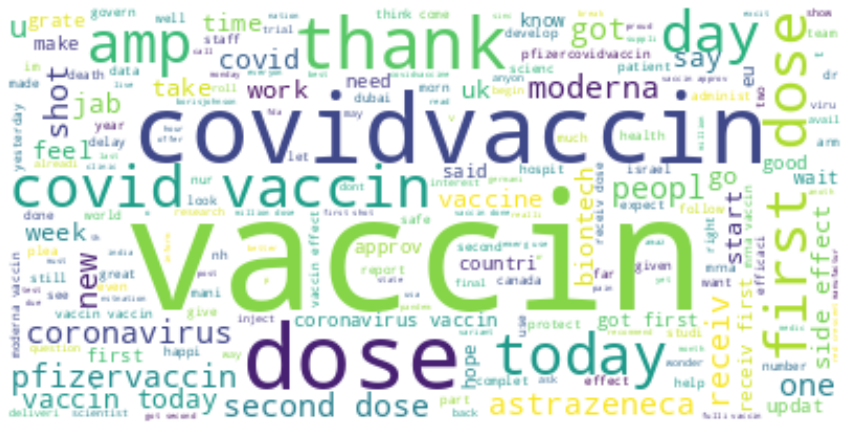

In [19]:
text = ' '.join(i for i in data.clean_text)
stopwords = set(STOPWORDS)
stopwords.add('pfizer')
stopwords.add('pfizerbiontech')
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
df = data.dropna()

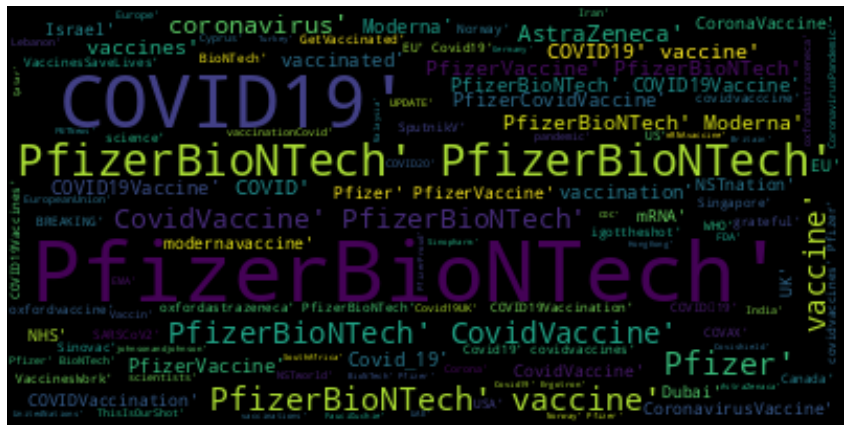

In [24]:
text = ' '.join(i for i in df.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='black').generate(text)
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [26]:
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data.clean_text]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data.clean_text]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data.clean_text]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data.clean_text]

In [27]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,clean_text,Positive,Negative,Neutral,Compound
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,['PfizerBioNTech'],Twitter for Android,0,0,False,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748,0.4019
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,NaN,Twitter Web App,1,1,False,world wrong side histori year hope biggest vac...,0.193,0.207,0.600,-0.0516
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000,0.0000
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,NaN,Twitter Web App,446,2129,False,fact immut senat even your ethic sturdi enough...,0.000,0.000,1.000,0.0000
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,explain need vaccin borisjohnson matthancock w...,0.000,0.000,1.000,0.0000


In [28]:
df = data[['clean_text', 'Positive', 'Negative', 'Neutral', 'Compound']]

In [29]:
df.head()

,clean_text,Positive,Negative,Neutral,Compound
0,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748,0.4019
1,world wrong side histori year hope biggest vac...,0.193,0.207,0.600,-0.0516
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000,0.0000
3,fact immut senat even your ethic sturdi enough...,0.000,0.000,1.000,0.0000
4,explain need vaccin borisjohnson matthancock w...,0.000,0.000,1.000,0.0000


In [30]:
x = sum(df.Positive)
y = sum(df.Negative)
z = sum(df.Neutral)
j = sum(df.Compound)

In [31]:
def sentiment_score(a,b,c):
  if a>b and a>c:
    print('Positive')
  elif b>a and b>c:
    print('Negative')
  else:
    print('Neutral')

In [32]:
sentiment_score(x,y,z)

Neutral


In [33]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)
print("Compound: ", j)

Positive:  743.139000000002
Negative:  356.0840000000002
Neutral:  6982.777999999991
Compound:  595.8295000000026
